# 1. Prepare & Load the Data
1.1 Download 'netflix_titles.csv' from the Kaggle dataset and save it to your working folder.

1.2 Import pandas, matplotlib.pyplot, and seaborn in your script or notebook.

1.3 Load the CSV: df = pd.read_csv('netflix_titles.csv').

1.4 Display the first 5 rows: df.head().

1.5 Show dataframe info and summary: df.info() and df.describe(include='all').

1.6 Print the dataset shape (rows, columns): df.shape.

1.7 Count missing values per column: df.isnull().sum().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\netflix_200_rows.csv')

df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Title 1,John Smith,Unknown,"January 25, 2021",1994,Not Rated,131 min,"Thriller, Drama",This is the description for Title 1.
1,s2,TV Show,Title 2,NaN,Canada,"December 24, 2021",1998,TV-14,37 min,"Romance, Thriller",This is the description for Title 2.
2,s3,TV Show,Title 3,NaN,Unknown,"April 27, 2018",1993,PG-13,29 min,"Comedy, Comedy",This is the description for Title 3.
3,s4,Movie,Title 4,Asha Patel,Japan,"September 23, 2015",2016,TV-PG,6 Seasons,"Romance, Anime",This is the description for Title 4.
4,s5,Movie,Title 5,John Smith,Brazil,"September 25, 2021",2020,Not Rated,45 min,"Comedy, Horror",This is the description for Title 5.


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       200 non-null    object
 1   type          200 non-null    object
 2   title         200 non-null    object
 3   director      137 non-null    object
 4   country       200 non-null    object
 5   date_added    200 non-null    object
 6   release_year  200 non-null    int64 
 7   rating        200 non-null    object
 8   duration      200 non-null    object
 9   listed_in     200 non-null    object
 10  description   200 non-null    object
dtypes: int64(1), object(10)
memory usage: 17.3+ KB


,release_year
count,200.000000
mean,2006.880000
std,9.870804
min,1990.000000
25%,1998.000000
50%,2007.000000
75%,2015.000000
max,2023.000000


In [4]:
print(df.shape)

(200, 11)


In [5]:
df.isnull().sum()

show_id          0
type             0
title            0
director        63
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

# 2. Data Cleaning (step-by-step)

2.1 Remove duplicate rows if present: df = df.drop_duplicates().

2.2 Convert 'date_added' to datetime: df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce').

2.3 Fill or handle missing 'country' values: e.g. df['country'] = df['country'].fillna('Unknown').

2.4 Handle missing 'rating' values (fill or mark as 'Not Rated').

2.5 Normalize 'duration' into a consistent numeric column (extract number and unit).

2.6 Create a 'revenue' or derived column only if relevant (skip if absent).

In [6]:
df = df.drop_duplicates()


In [7]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [8]:
df['country'] = df['country'].fillna('Unknown')

In [9]:
df['rating'] = df['rating'].fillna('Not Rated')

In [10]:
df['duration_value'] = df['duration'].str.extract(r'(\d+)')
df['duration_unit'] = df['duration'].str.extract(r'([A-za-z]+)')


# print(df['duration_value'])
# print(df['duration_unit'])


In [11]:
df['is_movie'] = (df['type'] == 'Movie').astype(int)
# print(df['is_movie'])

3. Basic Analysis Questions (use pandas)

3.1 How many titles are Movies and how many are TV Shows? (value_counts on 'type').

3.2 Which country has produced the most titles? (split 'country' by comma and count).

3.3 List the top 10 genres from 'listed_in' (split by comma, count, sort).

3.4 What are the oldest and newest release years? (min and max of 'release_year').

3.5 Which directors have the most titles? Show the top 10 directors.

3.6 Find the number of titles added each year (use 'date_added' after conversion).

In [12]:
df['type'].value_counts()

type
TV Show    111
Movie       89
Name: count, dtype: int64

In [13]:
df['country'].str.split(',').explode().str.strip().value_counts().head(10)

country
Japan             41
Unknown           32
Canada            30
United Kingdom    28
United States     24
Brazil            23
India             22
Name: count, dtype: int64

In [14]:
df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)

listed_in
Thriller       57
Comedy         56
Anime          47
Horror         46
Action         45
Documentary    41
Romance        40
Kids           36
Drama          32
Name: count, dtype: int64

In [15]:
df['release_year'].min()


np.int64(1990)

In [16]:
df['release_year'].max()

np.int64(2023)

In [17]:
top_directors = df['director'].value_counts().head(10)
print(top_directors)


director
Asha Patel     32
Maria Alves    28
John Smith     26
Kenji Sato     26
David Brown    25
Name: count, dtype: int64


In [18]:
title_per_year = df['date_added'].dt.year.value_counts().sort_index()
print(title_per_year)


date_added
2015    22
2016    25
2017    21
2018    28
2019    22
2020    26
2021    29
2022    23
2023     4
Name: count, dtype: int64


# Visualizations (Matplotlib & Seaborn) — one task per chart

4.1 Bar chart — Count of Movies vs TV Shows: use seaborn.countplot(x='type', data=df).

4.2 Bar chart — Top 10 countries by number of titles: prepare a dataframe of country counts and plot
sns.barplot().

4.3 Histogram — Distribution of release years: plt.hist(df['release_year'], bins=30) or sns.histplot().

4.4 Heatmap — Correlation matrix for numeric columns: sns.heatmap(df.corr(), annot=True).

4.5 Horizontal bar chart — Top 10 genres: use plt.barh() with genre counts.

4.6 Time series — Titles added per year: df.resample('Y', on='date_added').size().plot().

4.7 Catplot (bonus) — Compare 'type' across top 5 countries: filter top countries and use
sns.catplot(kind='count').

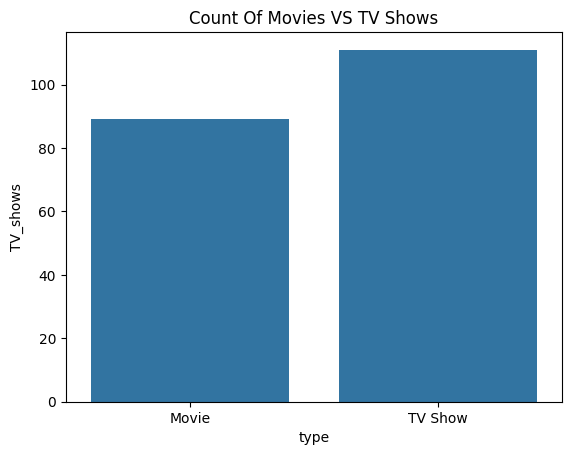

In [19]:
plt.Figure(figsize=(8, 5))
sns.countplot(data=df, x='type')
plt.title("Count Of Movies VS TV Shows")
plt.xlabel('type')
plt.ylabel('TV_shows')
plt.show()

In [20]:

country_counts = df['country'].value_counts().head(10)
print(country_counts)


country
Japan             41
Unknown           32
Canada            30
United Kingdom    28
United States     24
Brazil            23
India             22
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8304\2332840911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")


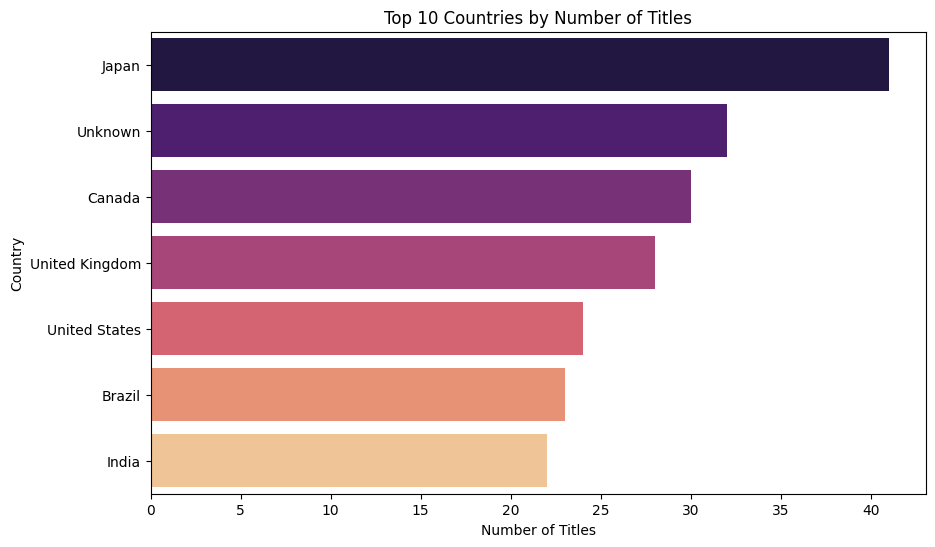

In [21]:

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Titles")
plt.show()


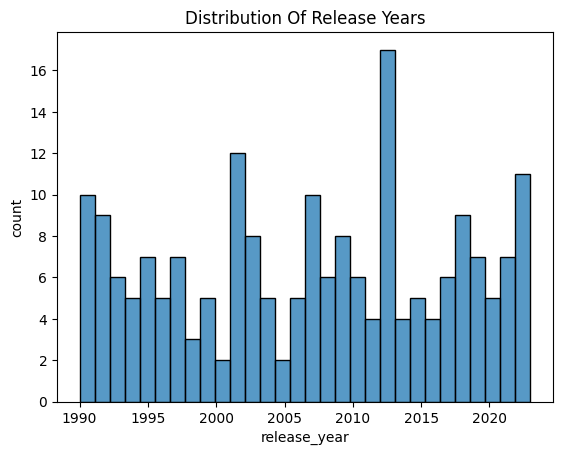

In [22]:
plt.Figure(figsize=(10,5))
sns.histplot(data=df,x='release_year', bins=30 )
plt.title("Distribution Of Release Years")
plt.xlabel('release_year')
plt.ylabel('count')
plt.show()


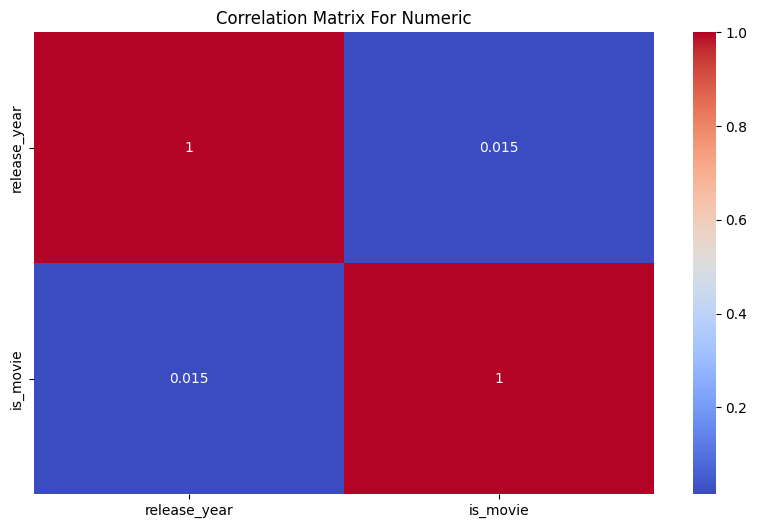

In [23]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes('number').corr()
sns.heatmap(corr,  annot=True, cmap='coolwarm')
plt.title("Correlation Matrix For Numeric")
plt.show()


In [24]:
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)


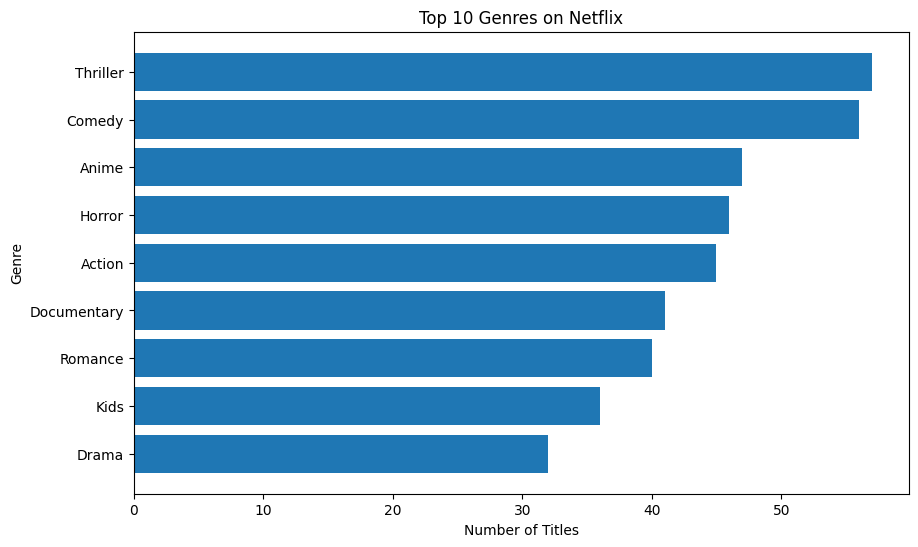

In [25]:
plt.figure(figsize=(10,6))
plt.barh(genre_counts.index, genre_counts.values)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 10 Genres on Netflix")
plt.gca().invert_yaxis()   
plt.show()
